In [1]:
pip install opencv-python-headless


   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB 109.5 kB/s eta 0:06:00
   ---------------------------------------- 0.0/39.4 MB 109.5 kB/s eta 0:06:00
   ---------------------------------------- 0.0/39.4 MB 103.4 kB/s eta 0:06:21
   ---------------------------------------- 0.0/39.4 MB 103.4 kB/s eta 0:06:21
   ---------------------------------------- 0.1/39.4 M

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Aneesh Mada\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import cv2

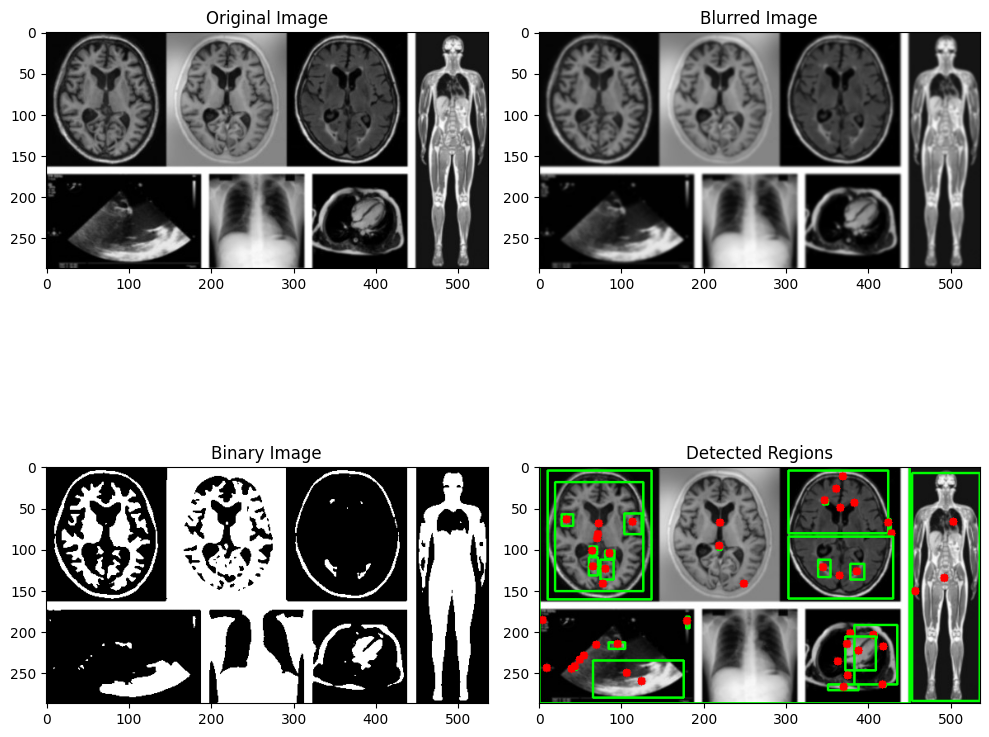

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

def preprocess_image(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at the specified path: {image_path}")
    
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred_image

def segment_image(blurred_image):
    # Apply Otsu's thresholding
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

def extract_features(binary_image):
    # Detect edges using Canny edge detector
    edges = cv2.Canny(binary_image, 50, 150)
    
    # Label connected components
    labeled_image = label(binary_image)
    properties = regionprops(labeled_image)
    return edges, properties

def draw_detections(original_image, properties):
    # Convert grayscale to BGR for colored bounding boxes
    output_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)
    
    for prop in properties:
        # Draw bounding box
        min_row, min_col, max_row, max_col = prop.bbox
        cv2.rectangle(output_image, (min_col, min_row), (max_col, max_row), (0, 255, 0), 2)
        
        # Draw centroid
        centroid = tuple(map(int, prop.centroid[::-1]))
        cv2.circle(output_image, centroid, 5, (0, 0, 255), -1)
    
    return output_image

def main(image_path):
    # Preprocess the image
    original_image, blurred_image = preprocess_image(image_path)
    
    # Segment the image
    binary_image = segment_image(blurred_image)
    
    # Extract features
    edges, properties = extract_features(binary_image)
    
    # Draw detections
    output_image = draw_detections(original_image, properties)
    
    # Display results
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1), plt.imshow(original_image, cmap='gray'), plt.title("Original Image")
    plt.subplot(2, 2, 2), plt.imshow(blurred_image, cmap='gray'), plt.title("Blurred Image")
    plt.subplot(2, 2, 3), plt.imshow(binary_image, cmap='gray'), plt.title("Binary Image")
    plt.subplot(2, 2, 4), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)), plt.title("Detected Regions")
    plt.tight_layout()
    plt.show()

# Replace with your image path
image_path = 'scan.jpg'

# Run the main function
main(image_path)


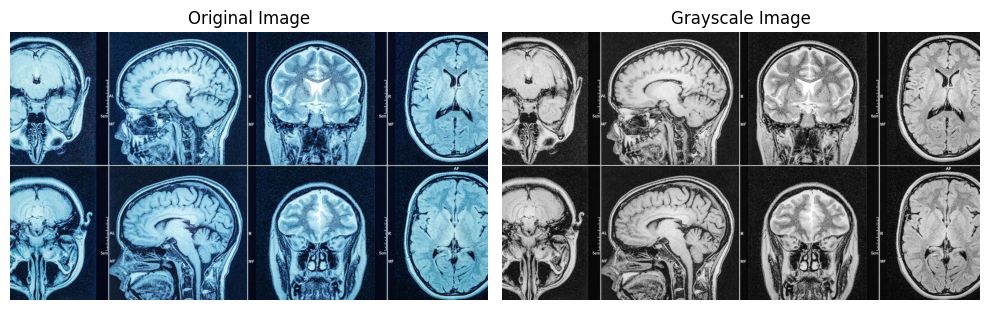

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load the original image (in color)
original_img = cv2.imread('ct scan.jpg')

# Load the grayscale image
gray_img = cv2.imread('ct scan.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the images were loaded successfully
if original_img is None or gray_img is None:
    print("Error: Image not found or unable to load!")
else:
    # Convert the original image from BGR to RGB for proper display in Matplotlib
    original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    
    # Display the images side by side
    plt.figure(figsize=(10, 5))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img_rgb)
    plt.title('Original Image')
    plt.axis('off')  # Hide axes
    
    # Display grayscale image
    plt.subplot(1, 2, 2)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')  # Hide axes
    
    plt.tight_layout()
    plt.show()
